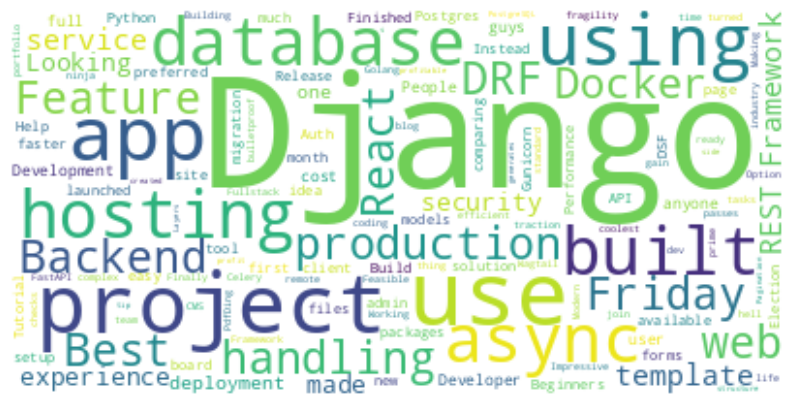

In [ ]:
# python.exe -m pip install --upgrade pip
# pip install matplotlib wordcloud requests

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests

class Reddit:
    def __init__(self, subreddit, limit):
        self.subreddit = subreddit
        self.limit = limit
        self.timeframe = 'month'
        self.listing = 'top'

    def get_reddit(self):
        try:
            base_url = f'https://www.reddit.com/r/{self.subreddit}/{self.listing}.json?limit={self.limit}&t={self.timeframe}'
            response = requests.get(base_url, headers={'User-agent': 'yourbot'})
            response.raise_for_status()  # Verifica se houve erros na requisição
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f'Um erro ocorreu: {e}')
            return None

    def get_post_titles(self, data):
        '''
        Extrai os títulos dos posts
        '''
        if data:
            return [post['data']['title'] for post in data['data']['children']]
        else:
            return []

    def wordcloud(self):
        data = self.get_reddit()
        posts = self.get_post_titles(data)

        if posts:
            # Gera a nuvem de palavras
            wc = WordCloud(background_color="white", max_words=2000, contour_width=1)
            text = ' '.join(posts)  # Concatena os títulos em uma única string
            wc.generate(text)

            # Exibe a nuvem de palavras
            plt.figure(figsize=(10, 10))
            plt.imshow(wc, interpolation='bilinear')
            plt.axis("off")
            plt.show()
        else:
            print("Não foi possível gerar a nuvem de palavras devido a dados insuficientes.")

if __name__ == "__main__":
    subreddit = 'Django'  # Substitua pelo subreddit desejado
    limit = 100  # Número de posts a serem considerados
    reddit = Reddit(subreddit, limit)
    reddit.wordcloud()
